In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
# %matplotlib notebook
#Import data
csv_data = pd.read_csv("Resources/movie_metadata.csv", encoding="utf-8")
df = pd.DataFrame(csv_data)
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [2]:
df.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
dtype: int64

In [3]:
# delete all the rows with missing values
df_clean=df.dropna()

In [4]:
df_clean.count()

color                        3756
director_name                3756
num_critic_for_reviews       3756
duration                     3756
director_facebook_likes      3756
actor_3_facebook_likes       3756
actor_2_name                 3756
actor_1_facebook_likes       3756
gross                        3756
genres                       3756
actor_1_name                 3756
movie_title                  3756
num_voted_users              3756
cast_total_facebook_likes    3756
actor_3_name                 3756
facenumber_in_poster         3756
plot_keywords                3756
movie_imdb_link              3756
num_user_for_reviews         3756
language                     3756
country                      3756
content_rating               3756
budget                       3756
title_year                   3756
actor_2_facebook_likes       3756
imdb_score                   3756
aspect_ratio                 3756
movie_facebook_likes         3756
dtype: int64

In [5]:
# select columns of interest to create new dataframe
imdb=df_clean[["movie_title","imdb_score","duration","content_rating","budget","aspect_ratio","title_year","country","language","gross"]].sort_values(by=["imdb_score"],ascending=False)

In [6]:
imdb["profit"]=imdb["gross"]-imdb["budget"]

In [7]:
# preview the dataset
imdb.head()

,movie_title,imdb_score,duration,content_rating,budget,aspect_ratio,title_year,country,language,gross,profit
1937,The Shawshank Redemption,9.3,142.0,R,25000000.0,1.85,1994.0,USA,English,28341469.0,3341469.0
3466,The Godfather,9.2,175.0,R,6000000.0,1.85,1972.0,USA,English,134821952.0,128821952.0
66,The Dark Knight,9.0,152.0,PG-13,185000000.0,2.35,2008.0,USA,English,533316061.0,348316061.0
2837,The Godfather: Part II,9.0,220.0,R,13000000.0,1.85,1974.0,USA,English,57300000.0,44300000.0
339,The Lord of the Rings: The Return of the King,8.9,192.0,PG-13,94000000.0,2.35,2003.0,USA,English,377019252.0,283019252.0


In [8]:
# clean up content rating. replace "Unrated" with "Not Rated"
imdb["content_rating"]=imdb["content_rating"].replace({"Unrated":"Not Rated","G":"PG"})

In [9]:
#keep cleaning the dataset by deleting ambiguous content rating
imdb_rt=imdb.loc[imdb["content_rating"] != "Approved"]
imdb_rt=imdb_rt.loc[imdb_rt["content_rating"] != "X"]
imdb_rt=imdb_rt.loc[imdb_rt["content_rating"] != "Passed"]
imdb_rt=imdb_rt.loc[imdb_rt["content_rating"] != "M"] 
imdb_rt=imdb_rt.loc[imdb_rt["content_rating"] != "GP"]
# categorize the movie duration based on the 50% quartile
imdb_rt.loc[imdb_rt.duration <= 106, 'length'] = '<=106' 
imdb_rt.loc[imdb_rt.duration > 106, 'length'] = '>106' 

In [10]:
imdb_rt.count()

movie_title       3723
imdb_score        3723
duration          3723
content_rating    3723
budget            3723
aspect_ratio      3723
title_year        3723
country           3723
language          3723
gross             3723
profit            3723
length            3723
dtype: int64

In [11]:
#count movie numbers for each content rating
imdb_rt["content_rating"].value_counts()

R            1700
PG-13        1308
PG            653
Not Rated      56
NC-17           6
Name: content_rating, dtype: int64

In [12]:
#count movie numbers for each year
imdb_rt["title_year"].value_counts()

2002.0    190
2006.0    189
2008.0    182
2005.0    182
2009.0    182
         ... 
1962.0      1
1933.0      1
1959.0      1
1952.0      1
1939.0      1
Name: title_year, Length: 65, dtype: int64

In [13]:
imdb_rt.describe()

,imdb_score,duration,budget,aspect_ratio,title_year,gross,profit
count,3723.000000,3723.000000,3.723000e+03,3723.000000,3723.000000,3.723000e+03,3.723000e+03
mean,6.459361,110.229922,4.660233e+07,2.113049,2003.312651,5.276966e+07,6.167329e+06
std,1.056250,22.464870,2.269758e+08,0.351634,9.132967,7.051319e+07,2.308977e+08
min,1.600000,45.000000,2.180000e+02,1.180000,1927.000000,1.620000e+02,-1.221330e+10
25%,5.900000,96.000000,1.000000e+07,1.850000,1999.000000,8.340925e+06,-1.066926e+07
50%,6.600000,106.000000,2.500000e+07,2.350000,2005.000000,3.012796e+07,1.335839e+06
75%,7.200000,120.000000,5.000000e+07,2.350000,2010.000000,6.709472e+07,2.570386e+07
max,9.300000,330.000000,1.221550e+10,16.000000,2016.000000,7.605058e+08,5.235058e+08


## Exploratory analysis

In [14]:
#duration statistics for movie length
imdb_rt["duration"].describe()

count    3723.000000
mean      110.229922
std        22.464870
min        45.000000
25%        96.000000
50%       106.000000
75%       120.000000
max       330.000000
Name: duration, dtype: float64

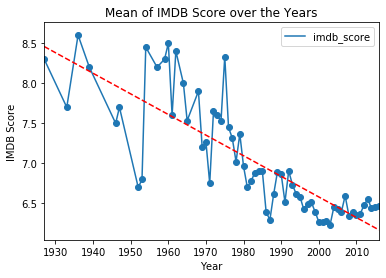

In [15]:
imdb_rt_group=imdb_rt.groupby(["title_year"])
# Store the Mean 
rt_mean=imdb_rt_group["imdb_score"].mean()
# Convert to DataFrame
rt_mean_df=pd.DataFrame(rt_mean).reset_index()
# Preview DataFrame
rt_mean_df.head()

#Mean IMDB score over the years
rt_mean_df.plot.line("title_year","imdb_score")
x = rt_mean_df['title_year']
y = rt_mean_df['imdb_score']
plt.scatter(x, y)
#add trendline for the mean IMDB score
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.xlabel("Year")
plt.ylabel("IMDB Score")

plt.title("Mean of IMDB Score over the Years")

plt.plot(x,p(x),"r--")
plt.savefig("Images/Mean of IMDB over Years.png")
plt.show()


It indicates that mean IMDB score decreased over the years. And there is a sharp decline in the mid 50s.

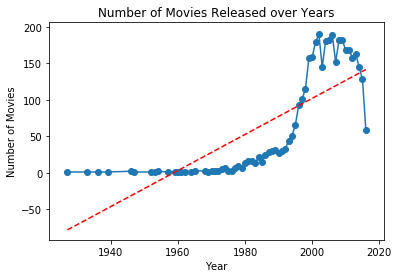

In [16]:

year=imdb_rt["title_year"].unique().astype(int)
year=sorted(year)

# get number of movies per year
num_movie_yr=[]
for i in year:
    tmp=imdb_rt.imdb_score[imdb_rt.title_year==i]
    num_movie_yr.append(len(tmp))
#Mean IMDB score over the years
# plt.line(year,num_movie_yr)

plt.plot(year, num_movie_yr)
plt.scatter(year, num_movie_yr)
#add trendline for the mean IMDB score
z = np.polyfit(year, num_movie_yr, 1)
p = np.poly1d(z)

plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released over Years")
plt.plot(year,p(year),"r--")
plt.savefig("Images/Number of Movies Released over Years.png")
plt.show()


Combine this graph and the imdb score trend graph, it demonstrates that producers pay much attention to the quantity of movies instead of quality.

## Statistical Analysis

#### Content rating

In [34]:
rt_mean

content_rating
NC-17        6.366667
Not Rated    6.958929
PG           6.325268
PG-13        6.271254
R            6.639471
Name: imdb_score, dtype: float64

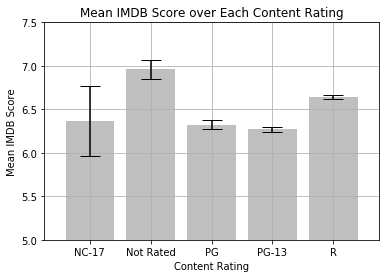

In [17]:
#group imdb_rt by content rating
imdb_rt_group=imdb_rt.groupby(["content_rating"])
# Store the Mean and SEM
rt_mean=imdb_rt_group["imdb_score"].mean()
rt_sem=imdb_rt_group["imdb_score"].sem()
# Convert to DataFrame
rt_mean_df=pd.DataFrame(rt_mean).reset_index()
rt_sem_df=pd.DataFrame(rt_sem).reset_index()
content_rt=imdb_rt["content_rating"].unique()
content_rt
x_axis = np.arange(len(content_rt))
plt.bar(x_axis,rt_mean_df["imdb_score"],yerr=rt_sem_df["imdb_score"],color="grey",alpha=0.5,capsize=10,align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [ "NC-17", "Not Rated", "PG", "PG-13", "R"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(5, 7.5)

# Set up the x_axis and y_axis limits

plt.grid()
plt.title("Mean IMDB Score over Each Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Mean IMDB Score")
plt.savefig("Images/Mean IMDB score over Content Rating.png")
plt.show()


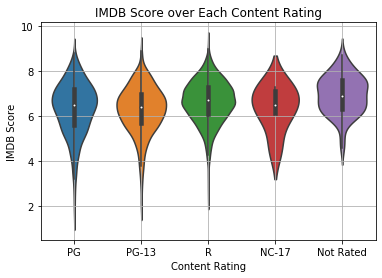

In [18]:
sns.violinplot(x="content_rating",y="imdb_score",data=imdb_rt,order=["PG","PG-13","R","NC-17","Not Rated"])
plt.grid()
plt.title("IMDB Score over Each Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("IMDB Score")
plt.savefig("Images/IMDB score over Content Rating_violinplot.png")
plt.show()


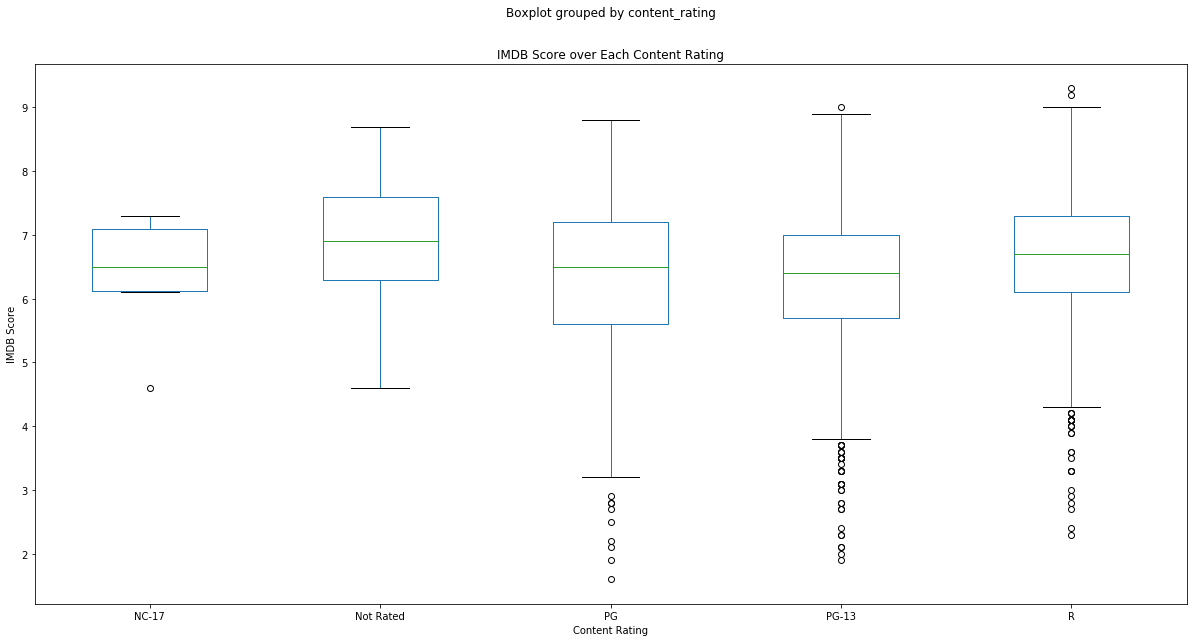

In [19]:
imdb_rt.boxplot("imdb_score",by="content_rating",figsize=(20,10))
plt.grid()
plt.title("IMDB Score over Each Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("IMDB Score")
plt.savefig("Images/IMDB score over Content Rating_boxplot.png")
plt.show()


In [20]:
# Extract individual groups
group1 = imdb_rt[imdb_rt["content_rating"] == "R"]["imdb_score"]
group2 = imdb_rt[imdb_rt["content_rating"] == "NC-17"]["imdb_score"]
group3 = imdb_rt[imdb_rt["content_rating"] == "Not Rated"]["imdb_score"]
group4 = imdb_rt[imdb_rt["content_rating"] == "PG"]["imdb_score"]
group5 = imdb_rt[imdb_rt["content_rating"] == "PG-13"]["imdb_score"]


# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=29.371992526835093, pvalue=4.4219962505081774e-24)

P-value is less than 0.05, so the IMDB scores are significantly different among 6 content ratings.

##### duration

In [21]:
#subset the dataset by 50% quartile 
short=imdb_rt.loc[imdb_rt["duration"]<=106]
long=imdb_rt.loc[imdb_rt["duration"]>106]

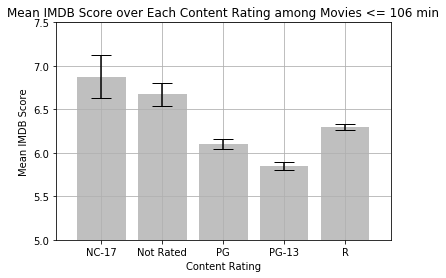

In [22]:
short_gp=short.groupby(["content_rating"])
# Store the Mean and SEM
short_mean=short_gp["imdb_score"].mean()
short_sem=short_gp["imdb_score"].sem()
# Convert to DataFrame
short_mean_df=pd.DataFrame(short_mean).reset_index()
short_sem_df=pd.DataFrame(short_sem).reset_index()
content_rt=short["content_rating"].unique()
content_rt
x_axis = np.arange(len(content_rt))
plt.bar(x_axis,short_mean_df["imdb_score"],yerr=short_sem_df["imdb_score"],color="grey",alpha=0.5,capsize=10,align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["NC-17", "Not Rated", "PG", "PG-13", "R"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(5, 7.5)

# Set up the x_axis and y_axis limits

plt.grid()
plt.title("Mean IMDB Score over Each Content Rating among Movies <= 106 min")
plt.xlabel("Content Rating")
plt.ylabel("Mean IMDB Score")
plt.savefig("Images/Mean IMDB score over Content Rating among Movies less than 106 min.png")
plt.show()

In [23]:
# Extract individual groups
group1 = short[short["content_rating"] == "R"]["imdb_score"]
group2 = short[short["content_rating"] == "NC-17"]["imdb_score"]
group3 = short[short["content_rating"] == "Not Rated"]["imdb_score"]
group4 = short[short["content_rating"] == "PG"]["imdb_score"]
group5 = short[short["content_rating"] == "PG-13"]["imdb_score"]


# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=18.94174449863079, pvalue=2.7526274584525412e-15)

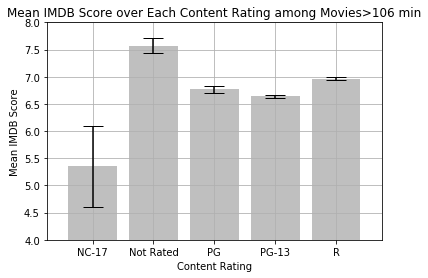

In [24]:
long_gp=long.groupby(["content_rating"])
# Store the Mean and SEM
long_mean=long_gp["imdb_score"].mean()
long_sem=long_gp["imdb_score"].sem()
# Convert to DataFrame
long_mean_df=pd.DataFrame(long_mean).reset_index()
long_sem_df=pd.DataFrame(long_sem).reset_index()
content_rt=long["content_rating"].unique()
content_rt
x_axis = np.arange(len(content_rt))
plt.bar(x_axis,long_mean_df["imdb_score"],yerr=long_sem_df["imdb_score"],color="grey",alpha=0.5,capsize=10,align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [ "NC-17", "Not Rated", "PG", "PG-13", "R"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(4, 8)

# Set up the x_axis and y_axis limits

plt.grid()
plt.title("Mean IMDB Score over Each Content Rating among Movies>106 min")
plt.xlabel("Content Rating")
plt.ylabel("Mean IMDB Score")
plt.savefig("Images/Mean IMDB score over Content Rating among Movies more than 106 min.png")
plt.show()

In [25]:
# Extract individual groups
group1 = long[long["content_rating"] == "R"]["imdb_score"]
group2 = long[long["content_rating"] == "NC-17"]["imdb_score"]
group3 = long[long["content_rating"] == "Not Rated"]["imdb_score"]
group4 = long[long["content_rating"] == "PG"]["imdb_score"]
group5 = long[long["content_rating"] == "PG-13"]["imdb_score"]
 

# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=18.232402152721995, pvalue=1.0744801953618919e-14)

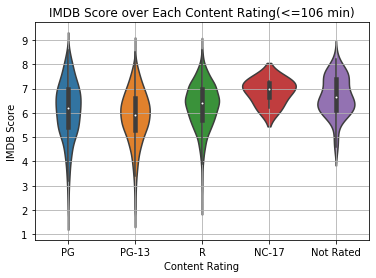

In [26]:
sns.violinplot(x="content_rating",y="imdb_score",data=short,order=["PG","PG-13","R","NC-17","Not Rated"])
plt.grid()
plt.title("IMDB Score over Each Content Rating(<=106 min)")
plt.xlabel("Content Rating")
plt.ylabel("IMDB Score")
plt.savefig("Images/IMDB score over Content Rating_violinplot short movie.png")
plt.show()

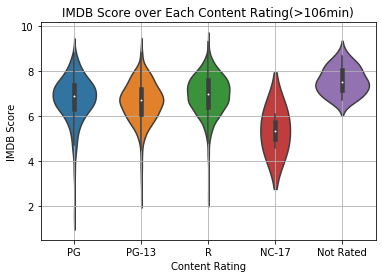

In [27]:
sns.violinplot(x="content_rating",y="imdb_score",data=long,order=["PG","PG-13","R","NC-17","Not Rated"])
plt.grid()
plt.title("IMDB Score over Each Content Rating(>106min)")
plt.xlabel("Content Rating")
plt.ylabel("IMDB Score")
plt.savefig("Images/IMDB score over Content Rating_violinplot long movie.png")
plt.show()

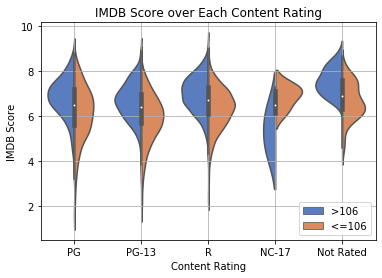

In [28]:
sns.violinplot(x="content_rating", y="imdb_score", hue="length",
                     data=imdb_rt, palette="muted", split=True,order=["PG","PG-13","R","NC-17","Not Rated"])
plt.grid()
plt.title("IMDB Score over Each Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("IMDB Score")
plt.legend(loc="lower right")
plt.savefig("Images/IMDB score over Content Rating_violinplot based on movie length.png")
plt.show()

In [29]:
long.imdb_score.mean()

6.818787878787878

In [30]:
short.imdb_score.mean()

6.117452830188662

In [31]:
stats.ttest_ind(short.imdb_score, long.imdb_score, equal_var=False)

Ttest_indResult(statistic=-21.55945460671142, pvalue=3.722737671139546e-97)

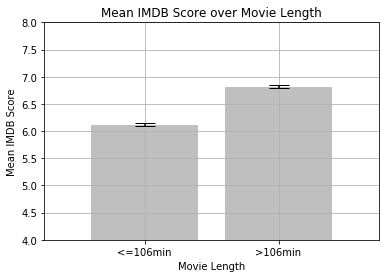

In [32]:
len_gp=imdb_rt.groupby(["length"])
# Store the Mean and SEM
len_mean=len_gp["imdb_score"].mean()
len_sem=len_gp["imdb_score"].sem()
# Convert to DataFrame
len_mean_df=pd.DataFrame(len_mean).reset_index()
len_sem_df=pd.DataFrame(len_sem).reset_index()
len_rt=len_gp["length"].unique()
len_rt
x_axis = np.arange(len(len_rt))
plt.bar(x_axis,len_mean_df["imdb_score"],yerr=len_sem_df["imdb_score"],color="grey",alpha=0.5,capsize=10,align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [ "<=106min",">106min"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(4, 8)

# Set up the x_axis and y_axis limits

plt.grid()
plt.title("Mean IMDB Score over Movie Length")
plt.xlabel("Movie Length")
plt.ylabel("Mean IMDB Score")
plt.savefig("Images/Mean IMDB Score over Movie Length.png")
plt.show()

In [33]:
# calculate the Pearson's correlation between two variables
corr, _ = pearsonr(imdb_rt["duration"], imdb_rt["imdb_score"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.370


Reference:
1) Trendline for Mean IMDB Score over Years was taken from the stackoverflow answer below:  
    https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
2) Number of Movie by Year was taken from below link:
    https://www.kaggle.com/aninda123/imdb-movie-analysis